In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')
data_location = 'data/wine.csv'
# Use seaborn's style
plt.style.use('seaborn')
# Reading data from the csv file
df = pd.read_csv(filepath_or_buffer=data_location, sep=',', decimal='.', header=None, names=[
    'Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids' , 
    'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
)
# Displaying the first 10 elements of the dataframe
df.head(10)

,Label,Alcohol,Malic Acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [301]:
# NaN Values Check
df.isnull().values.any()

False

In [304]:
# Negative Values Check
(df < 0).values.any()

False

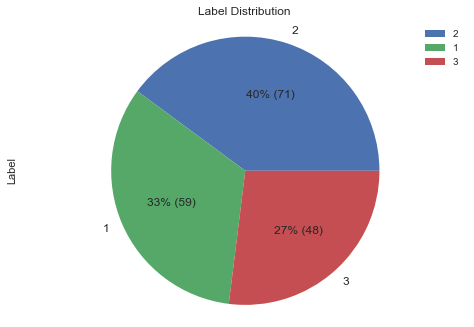

In [266]:
# Graph for Labels
val = df['Label'].value_counts()
val.plot(kind='pie', autopct=lambda p: '{:.0f}% ({:.0f})'.format(p, p * sum(val)/100), fontsize=12)
plt.axis("equal")
plt.title('Label Distribution')
plt.legend(loc='best')
plt.savefig('single/label.png', bbox_inches = 'tight')
plt.show()
plt.close()

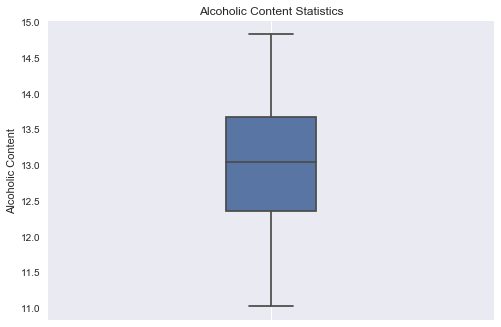

In [267]:
# Graph for alcohol %
sns.boxplot(x='Alcohol', data=df, orient='v', width=0.2)
plt.title('Alcoholic Content Statistics')
plt.legend()
plt.grid()
plt.ylabel('Alcoholic Content')
plt.savefig('single/alcohol.png', bbox_inches = 'tight')
plt.show()
plt.close()

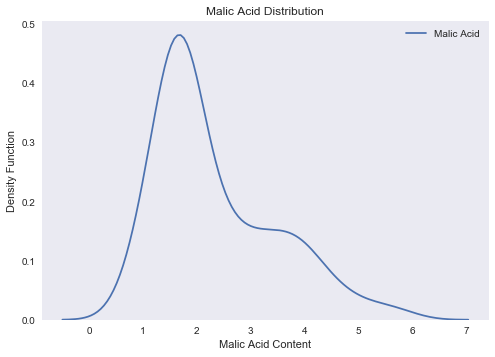

In [268]:
# Graph for alcohol %
sns.kdeplot(data=df['Malic Acid'])
plt.title('Malic Acid Distribution')
plt.legend()
plt.grid()
plt.xlabel('Malic Acid Content')
plt.ylabel('Density Function')
plt.savefig('single/malic_acid.png', bbox_inches = 'tight')
plt.show()
plt.close()


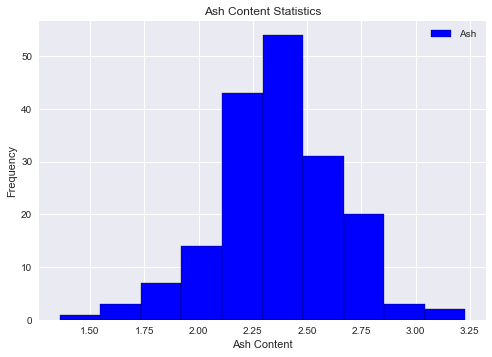

In [269]:
# Graph for ash %
df['Ash'].plot(kind='hist', bins=10, edgecolor="k", facecolor='blue')
plt.title('Ash Content Statistics')
plt.legend()
plt.xlabel('Ash Content')
plt.ylabel('Frequency')
plt.savefig('single/ash.png', bbox_inches = 'tight')
plt.show()
plt.close()

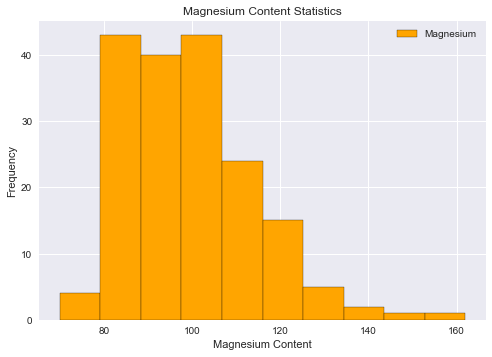

In [270]:
# Graph for magnesium %
df['Magnesium'].plot(kind='hist', bins=10, edgecolor="k", facecolor='orange')
plt.title('Magnesium Content Statistics')
plt.legend()
plt.xlabel('Magnesium Content')
plt.ylabel('Frequency')
plt.savefig('single/magnesium.png', bbox_inches = 'tight')
plt.show()
plt.close()

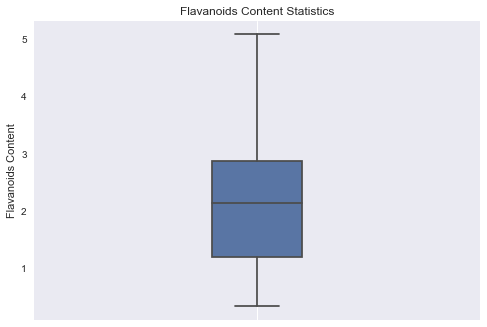

In [271]:
# Graph for Flavanoids %
sns.boxplot(x='Flavanoids', data=df, orient='v', width=0.2)
plt.title('Flavanoids Content Statistics')
plt.legend()
plt.grid()
plt.ylabel('Flavanoids Content')
plt.savefig('single/flavanoids.png', bbox_inches = 'tight')
plt.show()
plt.close()

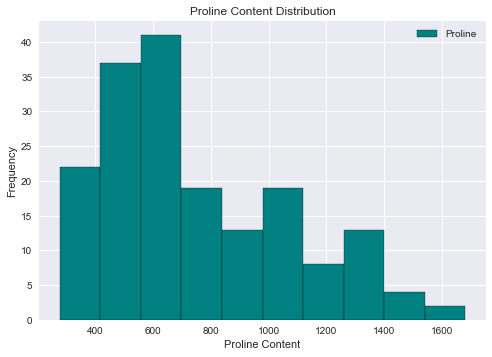

In [272]:
# Graph for Proline
df['Proline'].plot(kind='hist', bins=10, edgecolor="k", facecolor='teal')
plt.title('Proline Content Distribution')
plt.legend()
plt.xlabel('Proline Content')
plt.savefig('single/proline.png', bbox_inches = 'tight')
plt.show()
plt.close()

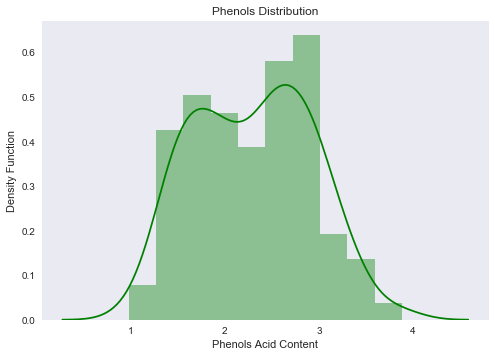

In [273]:
# Graph for phenols
sns.distplot(df['Total phenols'], bins=10, color='green')
plt.title('Phenols Distribution')
plt.legend()
plt.grid()
plt.xlabel('Phenols Acid Content')
plt.ylabel('Density Function')
plt.savefig('single/phenols.png', bbox_inches = 'tight')
plt.show()
plt.close()

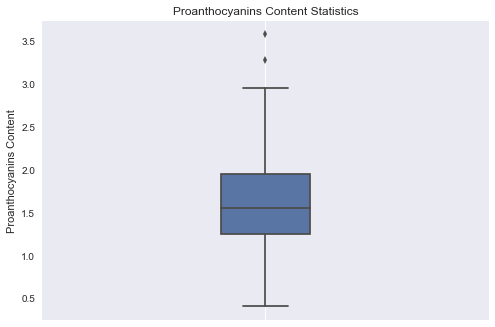

In [274]:
# Graph for Proanthocyanins
sns.boxplot(x='Proanthocyanins', data=df, orient='v', width=0.2)
plt.title('Proanthocyanins Content Statistics')
plt.legend()
plt.grid()
plt.ylabel('Proanthocyanins Content')
plt.savefig('single/proanthocyanins.png', bbox_inches = 'tight')
plt.show()
plt.close()

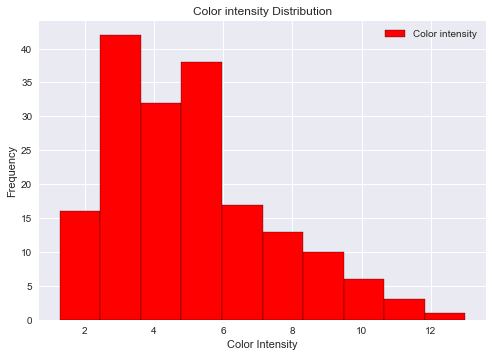

In [275]:
df['Color intensity'].plot(kind='hist', bins=10, edgecolor="k", facecolor='red')
plt.title('Color intensity Distribution')
plt.legend()
plt.xlabel('Color Intensity')
plt.savefig('single/color_intensity.png', bbox_inches = 'tight')
plt.show()
plt.close()

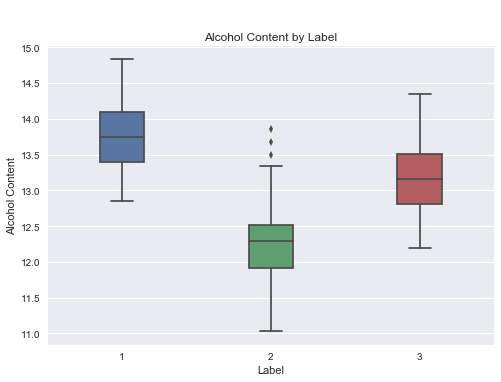

In [276]:
sns.boxplot(x='Label', y='Alcohol', data=df, width=0.3)
plt.suptitle(' ')
plt.ylabel('Alcohol Content')
plt.title('Alcohol Content by Label')
plt.savefig('pair/label_alcohol.png', bbox_inches = 'tight')
plt.show()
plt.close()

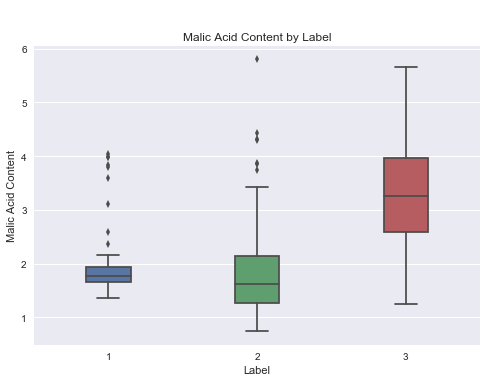

In [277]:
sns.boxplot(x='Label', y='Malic Acid', data=df, width=0.3)
plt.suptitle(' ')
plt.ylabel('Malic Acid Content')
plt.title('Malic Acid Content by Label')
plt.savefig('pair/label_malic-acid.png', bbox_inches = 'tight')
plt.show()
plt.close()

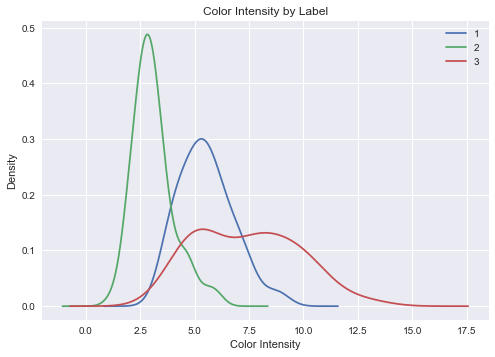

In [278]:
df.groupby('Label')['Color intensity'].plot(kind='density')
plt.xlabel('Color Intensity')
plt.ylabel('Density')
plt.title('Color Intensity by Label')
plt.legend()
plt.savefig('pair/label_cintensity.png', bbox_inches = 'tight')
plt.show()
plt.close()

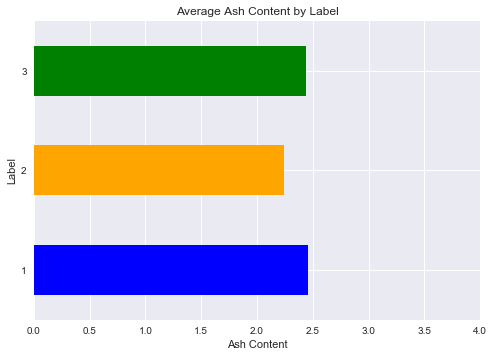

In [279]:
ax = df.groupby('Label')['Ash'].mean().plot.barh(color=['blue', 'orange', 'green'])
ax.set_xlim(0,4)
plt.ylabel('Label')
plt.xlabel('Ash Content')
plt.title('Average Ash Content by Label')
plt.savefig('pair/label_ash.png', bbox_inches = 'tight')
plt.show()
plt.close()

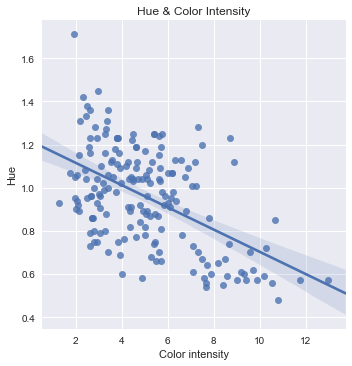

In [280]:
# Graph for hue-color_intensity
sns.lmplot(x = 'Color intensity', y='Hue', data=df)
plt.title('Hue & Color Intensity')
plt.savefig('pair/hue-color_intensity.png', bbox_inches = 'tight')
plt.show()
plt.close()

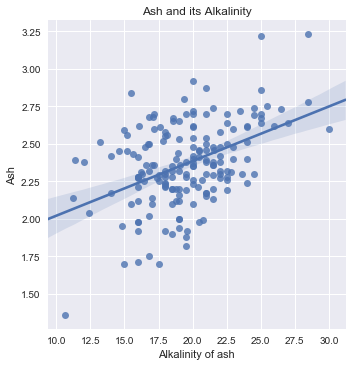

In [281]:
# Graph for ash-acalinity
sns.lmplot(x = 'Alkalinity of ash', y='Ash', data=df)
plt.title('Ash and its Alkalinity')
plt.savefig('pair/ash_alcalinity.png', bbox_inches = 'tight')
plt.show()
plt.close()

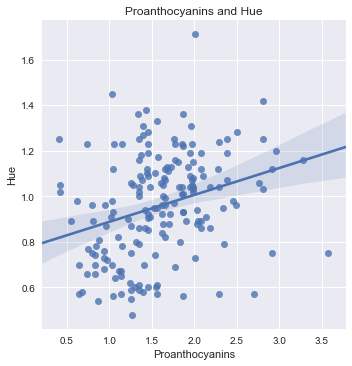

In [282]:
# Graph for hue-Proanthocyanins
sns.lmplot(x = 'Proanthocyanins', y='Hue', data=df)
plt.title('Proanthocyanins and Hue')
plt.savefig('pair/hue_proanthocyanins.png', bbox_inches = 'tight')
plt.show()
plt.close()

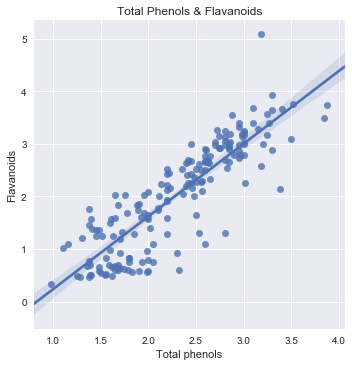

In [283]:
# Graph for total phenols-flavanoids
sns.lmplot(x = 'Total phenols', y='Flavanoids', data=df)
plt.title('Total Phenols & Flavanoids')
plt.savefig('pair/flavanoid_phenols.png', bbox_inches = 'tight')
plt.show()
plt.close()

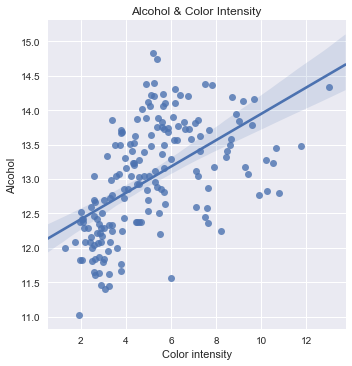

In [284]:
# Graph for total phenols-flavanoids
sns.lmplot(x = 'Color intensity', y='Alcohol', data=df)
plt.title('Alcohol & Color Intensity')
plt.savefig('pair/alcohol_cintensity.png', bbox_inches = 'tight')
plt.show()
plt.close()

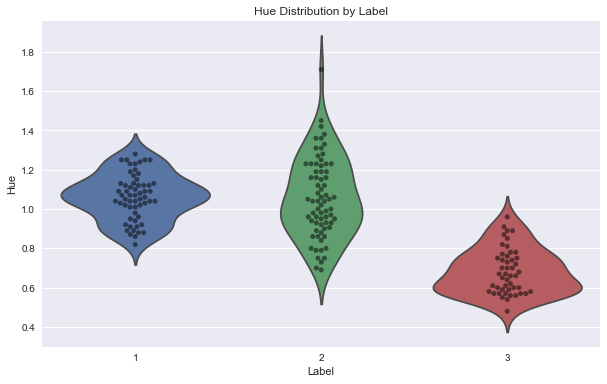

In [285]:
# Graph for label-hue
plt.figure(figsize=(10,6))
sns.violinplot(x='Label', y='Hue', data=df, inner=None)
sns.swarmplot(x='Label', y='Hue', data=df, color='k', alpha=0.5)
plt.title('Hue Distribution by Label')
plt.savefig('pair/label_hue.png', bbox_inches='tight')
plt.show()
plt.close()

In [306]:
# Classification Tasks
# Decision Tree and k Nearest Neighbors
# Preparing Data Set
data = df.copy()
features = ['Alcohol', 'Malic Acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids' , 
    'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
Y = data[['Label']].copy()
X = data[features].copy()

,Alcohol,Malic Acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [287]:
def array_split(a, n):
    """
    Split an array a into n-sized chunks
    :param a: target array
    :param n: chunk size
    :return: a 3D array contains the chunks
    """
    k, m = divmod(len(a), n)
    return (a[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in xrange(n))

In [288]:
# Automating drawing performance metrics chart
def draw_line_plots(x_axis,x_axis_name, array, test_size, filename):
    """
    Convert a 3D array into a dataframe and plot data from it 
    :param x_axis: array contains x_axis variables
    :param x_axis_name: name of the array that contains x_axis variables
    :param array: target array
    :param test_size: array contains test sizes
    :param filename: name of file
    :return: nothing
    """
    length = len(x_axis)
    # Split the array into x_axis sized chunks
    split_array = list(array_split(array, len(x_axis)))
    pan = pd.Panel(split_array)
    # Convert the 3D array into a Dataframe
    scores = pan.swapaxes(0, 2).to_frame()
    # Naming the columns 
    scores.columns = ['Error Rate', 'Recall Score', 'F1 Score', 'Precision Score']
    # Plotting 
    for i in range(len(test_size)):
        # Drawing a line chart for each column
        sns.lineplot(x=x_axis, y=scores['Error Rate'][(length*i):(length+length*i)],marker="s", label='Error Rate')
        sns.lineplot(x=x_axis, y=scores['Recall Score'][(length*i):(length+length*i)], marker="s", label='Recall Score')
        sns.lineplot(x=x_axis, y=scores['F1 Score'][(length*i):(length+length*i)], marker="s", label='F1 Score')
        sns.lineplot(x=x_axis, y=scores['Precision Score'][(length*i):(length+length*i)], marker="s", label='Precision Score')
        # Seting y axis limits
        plt.ylim(-0.1,1.1)
        plt.title('{:.0f}%'.format(test_size[i]*100))
        plt.ylabel(' ')
        plt.xlabel(x_axis_name)
        plt.legend(loc='best')
        plt.savefig('modelling/{}_{:.0f}.png'.format(filename, test_size[i]*100, bbox_inches='tight'))
        plt.show()
        plt.close()

In [289]:
def train_model_with_decision_tree(max_leaf_nodes, random_state, test_size, x, y, max_features=None):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 20)
    dt = DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes, random_state = random_state, max_features=max_features)
    dt = dt.fit(X_train, Y_train)
    # Test
    dt_predictions = dt.predict(X_test)
    con_matrix = confusion_matrix(y_true = Y_test, y_pred = dt_predictions)
    error_rate = 1 - accuracy_score(y_true = Y_test, y_pred = dt_predictions)
    re_score = recall_score(y_true = Y_test, y_pred = dt_predictions, average='weighted')
    f_score = f1_score(y_true = Y_test, y_pred = dt_predictions, average='weighted')
    p_score = precision_score(y_true = Y_test, y_pred = dt_predictions, average='weighted')
    # Confusion Matrix
    print ('Confusion Matrix:')
    print con_matrix
    # Accuracy score
    print 'Error Rate: ' + str(error_rate)
    # Recall Score
    print 'Recall Score: ' + str(re_score)
    # F1 Score
    print 'F1 Score: ' +  str(f_score)
    # Precision Score
    print 'Precision Score: ' + str(p_score)
    return [error_rate, re_score, f_score, p_score]

In [299]:
# Automating model training process
def mass_dt_trainer(max_features=[i for i in range(1,14)], test_size=[0.2, 0.4, 0.5], max_leaf_nodes=15, random_state=20, x=X, y=Y):
    score_list = []
    for i in max_features:
        for j in test_size:
            print ('Performance results for max_features = {}, test_size = {}'.format(i, j))
            score_list.append(train_model_with_decision_tree(max_leaf_nodes=15, random_state=20, test_size=j, x=X, y=Y, max_features=i))
            print('')
    draw_line_plots(max_features,'Max Features', score_list, test_size, 'dt')
    
    

Performance results for max_features = 1, test_size = 0.2
Confusion Matrix:
[[ 9  0  1]
 [ 0 14  3]
 [ 0  0  9]]
Error Rate: 0.11111111111111116
Recall Score: 0.8888888888888888
F1 Score: 0.8942266467733361
Precision Score: 0.9230769230769231

Performance results for max_features = 1, test_size = 0.4
Confusion Matrix:
[[18  2  1]
 [ 0 28  6]
 [ 0  0 17]]
Error Rate: 0.125
Recall Score: 0.875
F1 Score: 0.8782246716697936
Precision Score: 0.8996527777777779

Performance results for max_features = 1, test_size = 0.5
Confusion Matrix:
[[25  3  1]
 [ 0 36  5]
 [ 0  2 17]]
Error Rate: 0.1235955056179775
Recall Score: 0.8764044943820225
F1 Score: 0.8790202722786992
Precision Score: 0.8881289692232535

Performance results for max_features = 2, test_size = 0.2
Confusion Matrix:
[[10  0  0]
 [ 1 15  1]
 [ 0  0  9]]
Error Rate: 0.05555555555555558
Recall Score: 0.9444444444444444
F1 Score: 0.9441007031467559
Precision Score: 0.9497474747474747

Performance results for max_features = 2, test_size 

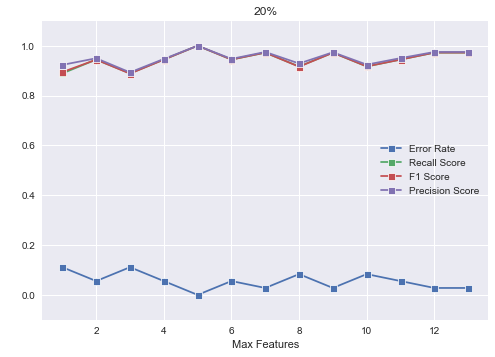

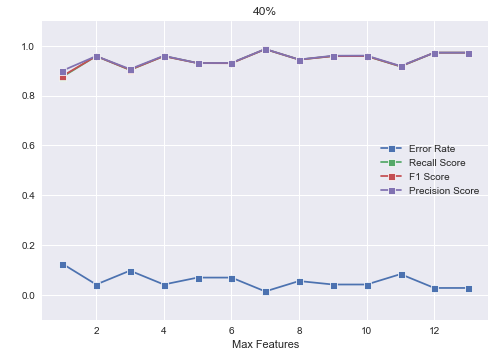

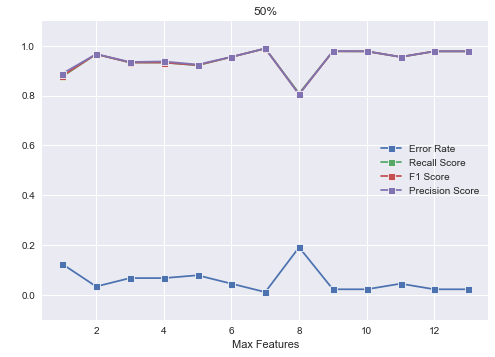

In [300]:
mass_dt_trainer()

In [292]:
def train_model_with_kNN(k_number, test_size, x,y, weights='uniform', random_state=20):
    kN = KNeighborsClassifier(k_number, weights)
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = random_state)
    kN.fit(X_train, Y_train.values.ravel())
    kN_predictions = kN.predict(X_test)
    con_matrix = confusion_matrix(y_true = Y_test, y_pred = kN_predictions)
    error_rate = 1 - accuracy_score(y_true = Y_test, y_pred = kN_predictions)
    re_score = recall_score(y_true = Y_test, y_pred = kN_predictions, average='weighted')
    f_score = f1_score(y_true = Y_test, y_pred = kN_predictions, average='weighted')
    p_score = precision_score(y_true = Y_test, y_pred = kN_predictions, average='weighted')
    # Confusion Matrix
    print 'Confusion Maxtrix: '
    print con_matrix
    # Accuracy score
    print 'Error Rate: ' + str(error_rate)
    # Recall Score
    print 'Recall Score: ' + str(re_score)
    # F1 Score
    print 'F1 Score: ' +  str(f_score)
    # Precision Score
    print 'Precision Score: ' + str(p_score)
    
    return [error_rate, re_score, f_score, p_score]

In [293]:
def mass_kNN_trainer(k=[i for i in range(1,11)], test_size=[0.2, 0.4, 0.5], weights='uniform', random_state=20, x=X, y=Y):
    score_list = []
    for i in k:
        for j in test_size:
            print ('Performance results for k = {}, test_size = {}, weights = {}'.format(i, j, weights))
            score_list.append(train_model_with_kNN(k_number=i, test_size=j, x=x,y=y, weights=weights, 
                                                    random_state=random_state))
            print('')
    draw_line_plots(k,'k', score_list, test_size, 'kNN_{}'.format(weights))

Performance results for k = 1, test_size = 0.2, weights = uniform
Confusion Maxtrix: 
[[10  0  0]
 [ 0 11  6]
 [ 0  4  5]]
Error Rate: 0.2777777777777778
Recall Score: 0.7222222222222222
F1 Score: 0.7274305555555556
Precision Score: 0.7377104377104376

Performance results for k = 1, test_size = 0.4, weights = uniform
Confusion Maxtrix: 
[[18  2  1]
 [ 0 23 11]
 [ 2  7  8]]
Error Rate: 0.3194444444444444
Recall Score: 0.6805555555555556
F1 Score: 0.687324242202291
Precision Score: 0.6963541666666667

Performance results for k = 1, test_size = 0.5, weights = uniform
Confusion Maxtrix: 
[[27  1  1]
 [ 1 26 14]
 [ 2  8  9]]
Error Rate: 0.3033707865168539
Recall Score: 0.6966292134831461
F1 Score: 0.702792054296588
Precision Score: 0.7155296950240772

Performance results for k = 2, test_size = 0.2, weights = uniform
Confusion Maxtrix: 
[[10  0  0]
 [ 0 12  5]
 [ 1  6  2]]
Error Rate: 0.33333333333333337
Recall Score: 0.6666666666666666
F1 Score: 0.6508597883597883
Precision Score: 0.6387686

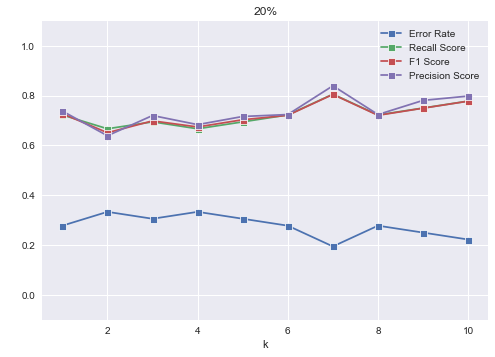

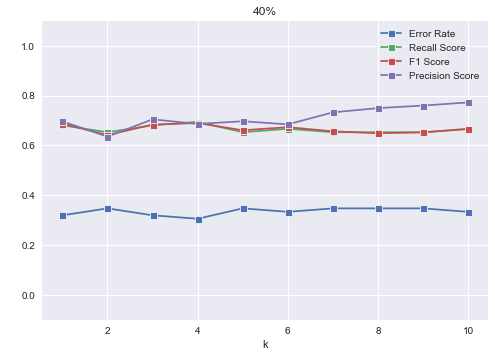

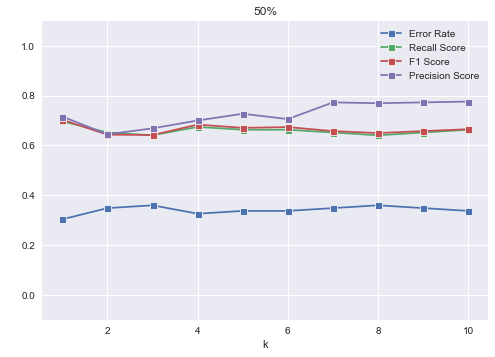

In [294]:
# Uniform Trainer
mass_kNN_trainer()

Performance results for k = 1, test_size = 0.2, weights = distance
Confusion Maxtrix: 
[[10  0  0]
 [ 0 11  6]
 [ 0  4  5]]
Error Rate: 0.2777777777777778
Recall Score: 0.7222222222222222
F1 Score: 0.7274305555555556
Precision Score: 0.7377104377104376

Performance results for k = 1, test_size = 0.4, weights = distance
Confusion Maxtrix: 
[[18  2  1]
 [ 0 23 11]
 [ 2  7  8]]
Error Rate: 0.3194444444444444
Recall Score: 0.6805555555555556
F1 Score: 0.687324242202291
Precision Score: 0.6963541666666667

Performance results for k = 1, test_size = 0.5, weights = distance
Confusion Maxtrix: 
[[27  1  1]
 [ 1 26 14]
 [ 2  8  9]]
Error Rate: 0.3033707865168539
Recall Score: 0.6966292134831461
F1 Score: 0.702792054296588
Precision Score: 0.7155296950240772

Performance results for k = 2, test_size = 0.2, weights = distance
Confusion Maxtrix: 
[[10  0  0]
 [ 0 11  6]
 [ 0  4  5]]
Error Rate: 0.2777777777777778
Recall Score: 0.7222222222222222
F1 Score: 0.7274305555555556
Precision Score: 0.7377

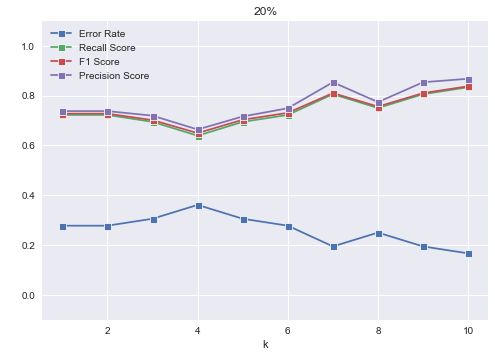

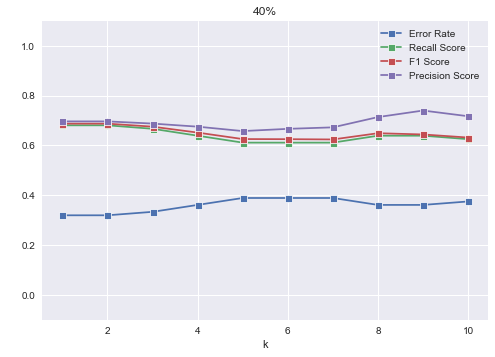

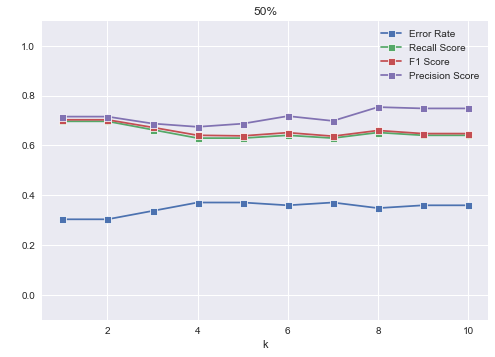

In [295]:
# Distance Trainer
mass_kNN_trainer(weights='distance')

In [296]:
df.describe()

,Label,Alcohol,Malic Acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000
